In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import expm

In [88]:
omega = 0.045
A = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, -omega],
    [0, 0, 0, 1],
    [0, omega, 0, 0]
])

num_iters = 600
dt = 0.5
F = expm(A*dt)
u0 =np.array([[0, 85*np.cos(np.pi/4), 0, -85*np.sin(np.pi/4)]]).transpose()
P0 =np.diag([10, 2, 10, 2])
means = [u0]
P_mats = [P0]

for k in range(num_iters):
    means.append(np.matmul(F, means[-1]))
    P_mats.append(np.matmul(np.matmul(F, P_mats[-1]), F.transpose()))

sigmas = [mat.diagonal() for mat in P_mats]

In [89]:
means

[array([[  0.       ],
        [ 60.1040764],
        [  0.       ],
        [-60.1040764]]), array([[ 30.38757379],
        [ 61.44109082],
        [-29.71143146],
        [-58.73663558]]), array([[ 61.43590686],
        [ 62.74700199],
        [-58.7316798 ],
        [-57.33946059]]), array([[ 93.12928164],
        [ 64.02114884],
        [-87.04605415],
        [-55.91325873]]), array([[ 125.45165405],
        [  65.26288634],
        [-114.64022097],
        [ -54.45875197]]), array([[ 158.38666157],
        [  66.47158591],
        [-141.50021128],
        [ -52.97667663]]), array([[ 191.91763156],
        [  67.64663565],
        [-167.6124278 ],
        [ -51.46778298]]), array([[ 226.02758968],
        [  68.78744073],
        [-192.96365178],
        [ -49.93283487]]), array([[ 260.69926849],
        [  69.89342364],
        [-217.54104969],
        [ -48.37260932]]), array([[ 295.91511621],
        [  70.96402449],
        [-241.33217976],
        [ -46.78789617]]), array([[ 

In [90]:
sigmas

[array([10,  2, 10,  2]),
 array([10.49997891,  2.        , 10.49997891,  2.        ]),
 array([11.99966252,  2.        , 11.99966252,  2.        ]),
 array([14.49829167,  2.        , 14.49829167,  2.        ]),
 array([17.99460146,  2.        , 17.99460146,  2.        ]),
 array([22.48682197,  2.        , 22.48682197,  2.        ]),
 array([27.9726791,  2.       , 27.9726791,  2.       ]),
 array([34.44939577,  2.        , 34.44939577,  2.        ]),
 array([41.91369326,  2.        , 41.91369326,  2.        ]),
 array([50.36179294,  2.        , 50.36179294,  2.        ]),
 array([59.78941814,  2.        , 59.78941814,  2.        ]),
 array([70.19179632,  2.        , 70.19179632,  2.        ]),
 array([81.5636615,  2.       , 81.5636615,  2.       ]),
 array([93.89925692,  2.        , 93.89925692,  2.        ]),
 array([107.19233795,   2.        , 107.19233795,   2.        ]),
 array([121.43617524,   2.        , 121.43617524,   2.        ]),
 array([136.62355817,   2.        , 136.6235

In [91]:
final_sigmas = [2 * np.sqrt(vec) for vec in sigmas]

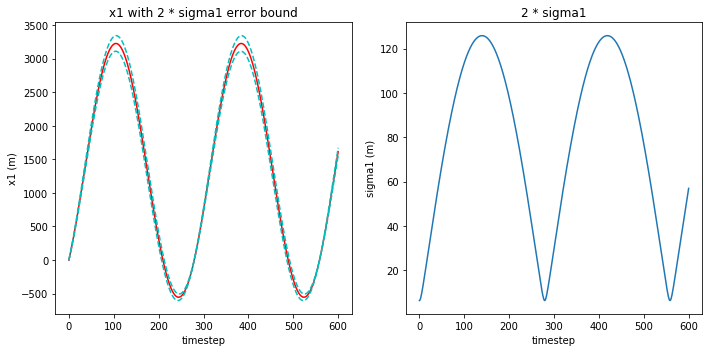

In [92]:
plt_number = 0
fig = plt.figure(figsize = (10,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,600, 601), [mean[plt_number] for mean in means], color='r')
# Upper bound
ax1.plot(np.linspace(0,600, 601), [mean[plt_number] + dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,600, 601), [mean[plt_number] - dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
ax1.set_title("x1 with 2 * sigma1 error bound")
ax1.set_ylabel("x1 (m)")
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0, 600, 601), [sig[plt_number] for sig in final_sigmas])
ax2.set_title("2 * sigma1")
ax2.set_ylabel("sigma1 (m)")
ax2.set_xlabel("timestep")
plt.tight_layout()

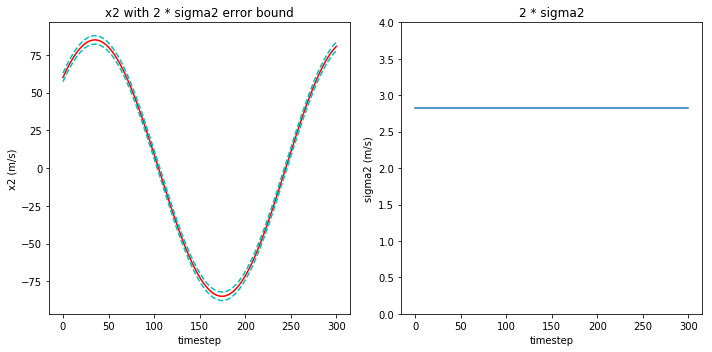

In [65]:
plt_number = 1
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] for mean in means], color='r')
# Upper bound
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] + dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] - dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
ax1.set_title("x2 with 2 * sigma2 error bound")
ax1.set_ylabel("x2 (m/s)")
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0, 300, 301), [sig[plt_number] for sig in final_sigmas])
ax2.set_title("2 * sigma2")
ax2.set_ylabel("sigma2 (m/s)")
ax2.set_xlabel("timestep")
ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

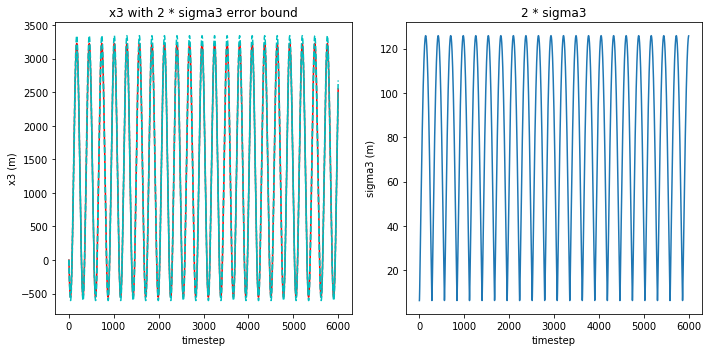

In [86]:
plt_number = 2
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,6000, 6001), [mean[plt_number] for mean in means], color='r')
# Upper bound
ax1.plot(np.linspace(0,6000, 6001), [mean[plt_number] + dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,6000, 6001), [mean[plt_number] - dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
ax1.set_title("x3 with 2 * sigma3 error bound")
ax1.set_ylabel("x3 (m)")
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0, 6000, 6001), [sig[plt_number] for sig in final_sigmas])
ax2.set_title("2 * sigma3")
ax2.set_ylabel("sigma3 (m)")
ax2.set_xlabel("timestep")
plt.tight_layout()

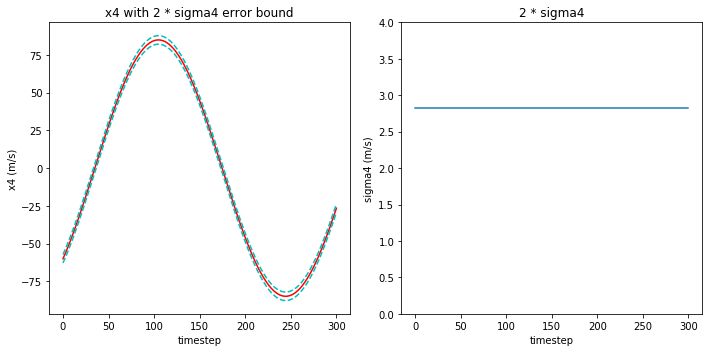

In [67]:
plt_number = 3
fig = plt.figure(figsize = (10 ,5))
ax1 = plt.subplot(121)
# mean
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] for mean in means], color='r')
# Upper bound
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] + dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
# Lower bound
ax1.plot(np.linspace(0,300, 301), [mean[plt_number] - dev[plt_number] for mean, dev in zip(means, final_sigmas)], color='c', linestyle='--')
ax1.set_title("x4 with 2 * sigma4 error bound")
ax1.set_ylabel("x4 (m/s)")
ax1.set_xlabel("timestep")

ax2=plt.subplot(122)
ax2.plot(np.linspace(0, 300, 301), [sig[plt_number] for sig in final_sigmas])
ax2.set_title("2 * sigma4")
ax2.set_ylabel("sigma4 (m/s)")
ax2.set_xlabel("timestep")
ax2.set_ylim(bottom=0, top=4)
plt.tight_layout()

## 1 c

In [74]:
dt

0.5

In [73]:
u_as = [[0, 85 * np.cos(np.pi/4), 0, -85 * np.sin(np.pi/4)]]
Pas = [np.diag([10, 4, 10, 4])]
u_bs = [[3200, 85* np.cos(np.pi/4), 3200, -85*np.sin(np.pi/4)]]
Pbs = [np.diag([11, 3.5, 11, 3.5])]
xi_r = 100
eta_r = 100

In [70]:
dt = 0.5
num_iters = 600

omega_a = 0.045
A_a = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, -omega_a],
    [0, 0, 0, 1],
    [0, omega_a, 0, 0]
])

omega_b = -0.045
A_b = np.array([
    [0, 1, 0, 0],
    [0, 0, 0, -omega_b],
    [0, 0, 0, 1],
    [0, omega_b, 0, 0]
])
F_a = expm(A_a * dt)
F_b = expm(A_b * dt)

Z = np.array([
    [1, 0, 0, 0],
    [0, 0, 1, 0]
])

u_a = np.array([[0, 85 * np.cos(np.pi/4), 0, -85 * np.sin(np.pi/4)]]).transpose()
P_a = np.diag([10, 4, 10, 4])
u_b = np.array([[3200, 85* np.cos(np.pi/4), 3200, -85*np.sin(np.pi/4)]]).transpose()
P_b = np.diag([11, 3.5, 11, 3.5])

u_rs = []
u_rs.append(np.matmul(Z , (np.matmul(np.eye(4), u_a) - np.matmul(np.eye(4), u_b))))
# u_rs.append(np.matmul(Z , (np.matmul(F_a, u_a) - np.matmul(F_b, u_b))))

P_rs = []

# updated_sum = np.matmul(np.matmul(F_a, P_a), F_a.transpose()) + np.matmul(np.matmul(F_b, P_b), F_b.transpose())
P_r = np.matmul(np.matmul(Z, P_a + P_b), Z.transpose())
P_rs.append(P_r)

xi_r = 100
eta_r = 100

for i in range(num_iters):
    # Update u_a's
    u_a = np.matmul(F_a, u_a)
    # Update u_b's
    u_b = np.matmul(F_b, u_b)
    # update u_r's
    u_r = np.matmul(Z , (np.matmul(F_a, u_a) - np.matmul(F_b, u_b)))
    u_rs.append(u_r)
    # update P_a's
    P_a = np.matmul(np.matmul(F_a, P_a), F_a.transpose()) 
    # update P_b's
    P_b = np.matmul(np.matmul(F_b, P_b), F_b.transpose()) 
    # update P_r's
    P_r = np.matmul(np.matmul(Z, (P_a + P_b)), Z.transpose())
    P_rs.append(P_r)


In [71]:
u_rs[0].transpose()[0]

array([-3200., -3200.])

In [72]:
cdfs = []
for mean, cov in zip(u_rs, P_rs):
#     mvn=multivariate_normal(mean=mean.transpose()[0], cov = mat)
#     cdfs.append(mvn.cdf([-100, 100]))
    cdfs.append(mvnormcdf(lower=[-100, -100], upper=[100, 100], mu=mean.transpose()[0], cov=cov))

In [73]:
len(cdfs)

601

Text(0,0.5,'Probability of Collision')

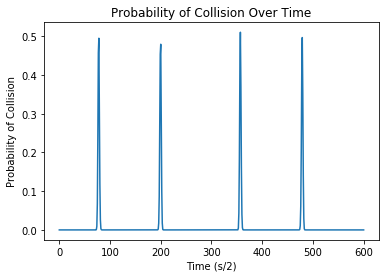

In [74]:
fig = plt.figure()
ax1 = plt.subplot(111)
ax1.plot(np.linspace(0, 600, 601), cdfs)
ax1.set_title("Probability of Collision Over Time")
ax1.set_xlabel("Time (s/2)")
ax1.set_ylabel("Probability of Collision")

In [63]:
from scipy.stats import multivariate_normal
mean = np.array([1,5])
covariance = np.matrix([[1, 0.3 ],[0.3, 1]])
mvn = multivariate_normal(mean=mean, cov=covariance)
print("CDF:", mvn.cdf(np.array([2,4])))


CDF: 0.14833820905742245


In [64]:
from scipy.stats import multivariate_normal
from statsmodels.sandbox.distributions.extras import mvnormcdf
from statsmodels.sandbox.distributions.extras import mvstdnormcdf


In [65]:
mvnormcdf(upper=100, mu=mean, cov=cov)

0.9993075966484462

In [66]:
for i in range(1, 20, 2):
    cov_example = np.array(((i, 0), (0, i)))
    mean_example = np.array((0, 0))
    print(mvnormcdf(lower=[-100, -100], upper=[100, 100], mu=mean.transpose()[0], cov=cov_example))


1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [67]:
mean

array([1, 5])

In [68]:
np.argsort(cdfs)

array([  0, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
       175, 162, 176, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187,
       231, 232, 233, 177, 234, 161, 159, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 160, 144, 146, 147, 148, 149,
       299, 151, 152, 153, 154, 155, 156, 157, 158, 145, 235, 236, 237,
       271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283,
       270, 284, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 285, 269, 268, 267, 238, 239, 240, 241, 242, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 130, 129, 150, 127,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  25,  47,  24,  22,   1,
         2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  23, 128, 300,  93, 10

In [69]:
85 * np.sin(np.pi/4)

60.104076400856535

In [54]:
85 * np.cos(np.pi/4)

60.10407640085654

In [56]:
(60**2 + 60**2)**.5

84.8528137423857

In [57]:
80 * 80

6400